In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ast import literal_eval
import os
import itertools

## Importing data and initial data processing

In [54]:
base_dir = os.getcwd()+os.sep

data_str1="_HeteroSynapses.dat"
data_str2="_OverallHS.dat"

file1 = [f for f in os.listdir(base_dir) if f.endswith(data_str1)]
file2 = [f for f in os.listdir(base_dir) if f.endswith(data_str2)]

data1 = pd.read_csv(base_dir + file1[0], delimiter='\t', comment='#', header=1)
data2 = pd.read_csv(base_dir + file2[0], delimiter='\t', comment='#', header=1)

data1=data1.drop(columns=data1.columns[-1])
data2=data2.drop(columns=data2.columns[-1])
#data1=data1.iloc[:,2:-1]
#data1=data1.applymap(literal_eval)
#data1["time"]=data2["t"]

times = data1.iloc[::,:1]
syn_weight_data = data1.iloc[::,1:].applymap(lambda x: x.split(',')[2]).astype('float32')
theta_cooperativity_data = data1.iloc[::,1:].applymap(lambda x: x.split(',')[1]).astype('float32')

#Implement .groupby() factors to discriminate by population, neuron and synapse. The columns can be whatever

In [97]:
pop_column=list()
neuron_column=list()
synapse_column=list()
big_time=list()


for i in data1.columns[1:,]:
    pop, neuron, synapse=[f for f in i.split("_")[1:]]
    pop_column.extend(pop)
    neuron_column.extend(neuron)
    synapse_column.extend(synapse)
data_points_total=(int(pop)+1)*(int(neuron)+1)*(int(synapse)+1)

pop_column.extend(list(pop_column*(len(data1["t"])-1)))
neuron_column.extend(list(neuron_column*(len(data1["t"])-1)))
synapse_column.extend(list(synapse_column*(len(data1["t"])-1)))

syn_weight_data = data1.iloc[::,1:].applymap(lambda x: x.replace("{", "")).applymap(lambda x: x.replace("}", "")).applymap(lambda x: x.split(',')[2]).astype('float32').stack()
theta_cooperativity_data = data1.iloc[::,1:].applymap(lambda x: x.replace("{", "")).applymap(lambda x: x.replace("}", "")).applymap(lambda x: x.split(',')[1]).astype('float32').stack()
dist_to_node=data1.iloc[::,1:].applymap(lambda x: x.replace("{", "")).applymap(lambda x: x.replace("}", "")).applymap(lambda x: x.split(',')[0]).astype('float32').stack()
last_spiketime=data1.iloc[::,1:].applymap(lambda x: x.replace("{", "")).applymap(lambda x: x.replace("}", "")).applymap(lambda x: x.split(',')[3]).astype('float32').stack()

big_time = [itertools.repeat(elem, data_points_total) for elem in times.values.tolist()]
big_time = list(itertools.chain.from_iterable(big_time))

fdata=pd.DataFrame({'time':big_time, 'pop':pop_column, 'neuron':neuron_column, 'synapse':synapse_column, 'weights':syn_weight_data, 'theta':theta_cooperativity_data, 'dist':dist_to_node, 'last_sp':last_spiketime})

## Plotting

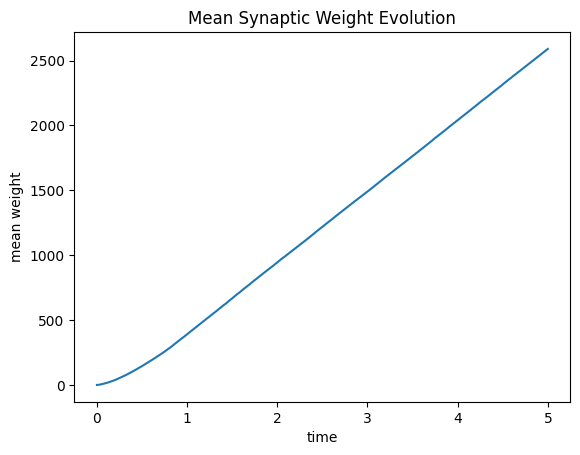

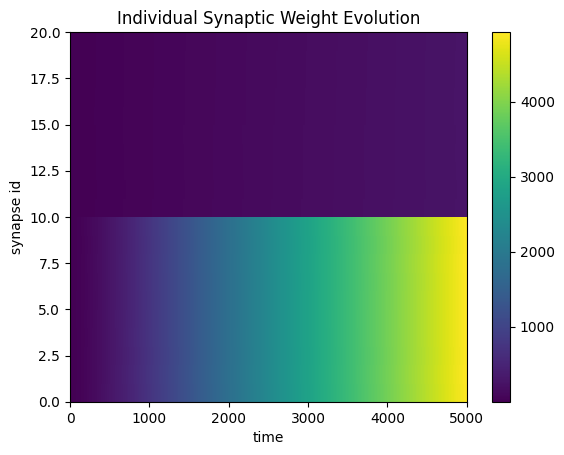

In [39]:
mean_wts = syn_weight_data.mean(axis=1)

plt.plot(times, mean_wts)
plt.title("Mean Synaptic Weight Evolution")
plt.xlabel("time")
plt.ylabel("mean weight")
plt.show()

plt.pcolor(syn_weight_data.T)
plt.colorbar()
# plt.clim(0,2)
plt.title("Individual Synaptic Weight Evolution")
plt.xlabel("time")
plt.ylabel("synapse id")
plt.show()

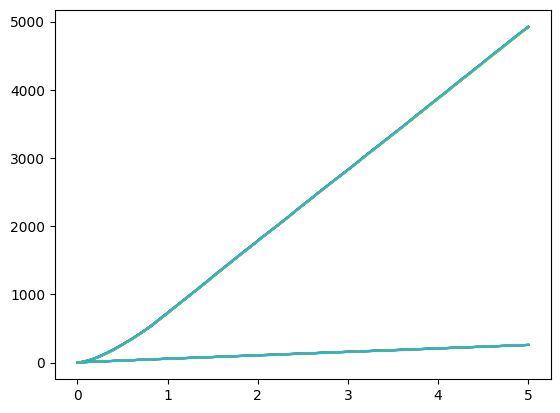

In [40]:
plt.plot(times, syn_weight_data)
plt.show()